In [ ]:
from google.colab import files
data = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('data.csv')
# .iloc[1:]
print(df.head())

   PassengerId  Pclass  Sex   Age  SibSp  Parch  Survived
0            1       3    1  34.5      1      0         0
1            2       1    0  47.0      1      0         1
2            3       3    0  62.0      0      0         1
3            4       1    0  27.0      1      0         1
4            5       3    1  22.0      0      0         0


In [ ]:
features=["PassengerId","Pclass","Sex","Age","SibSp","Parch","Survived"]
X=df[features]
y=df.Survived

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 1)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print("Accuracy : " , metrics.accuracy_score(y_test,y_pred))

Accuracy :  1.0


In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus 

dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True,rounded = True,special_characters = True , feature_names=features, class_names = ['0','1'])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<Survived &le; 0.5<br/>gini = 0.463<br/>samples = 623<br/>value = [396, 227]<br/>class = 0>, fillcolor="#f4c9aa"] ;
1 [label=<gini = 0.0<br/>samples = 396<br/>value = [396, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 227<br/>value = [0, 227]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


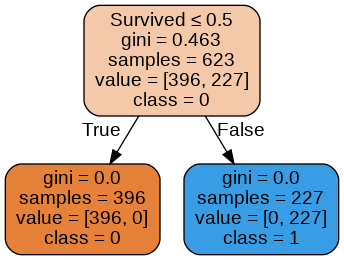

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('result.png')
Image(graph.create_png())